In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score,f1_score,precision_score,recall_score,roc_curve,precision_recall_curve,classification_report
from xgboost import XGBClassifier

In [ ]:
url = 'https://raw.githubusercontent.com/ssivaguru/ICAML/main/data.csv'
df = pd.read_csv(url)

In [ ]:
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
df.shape

(6819, 96)

In [ ]:
df['Bankrupt?'].value_counts()/df.shape[0]

0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


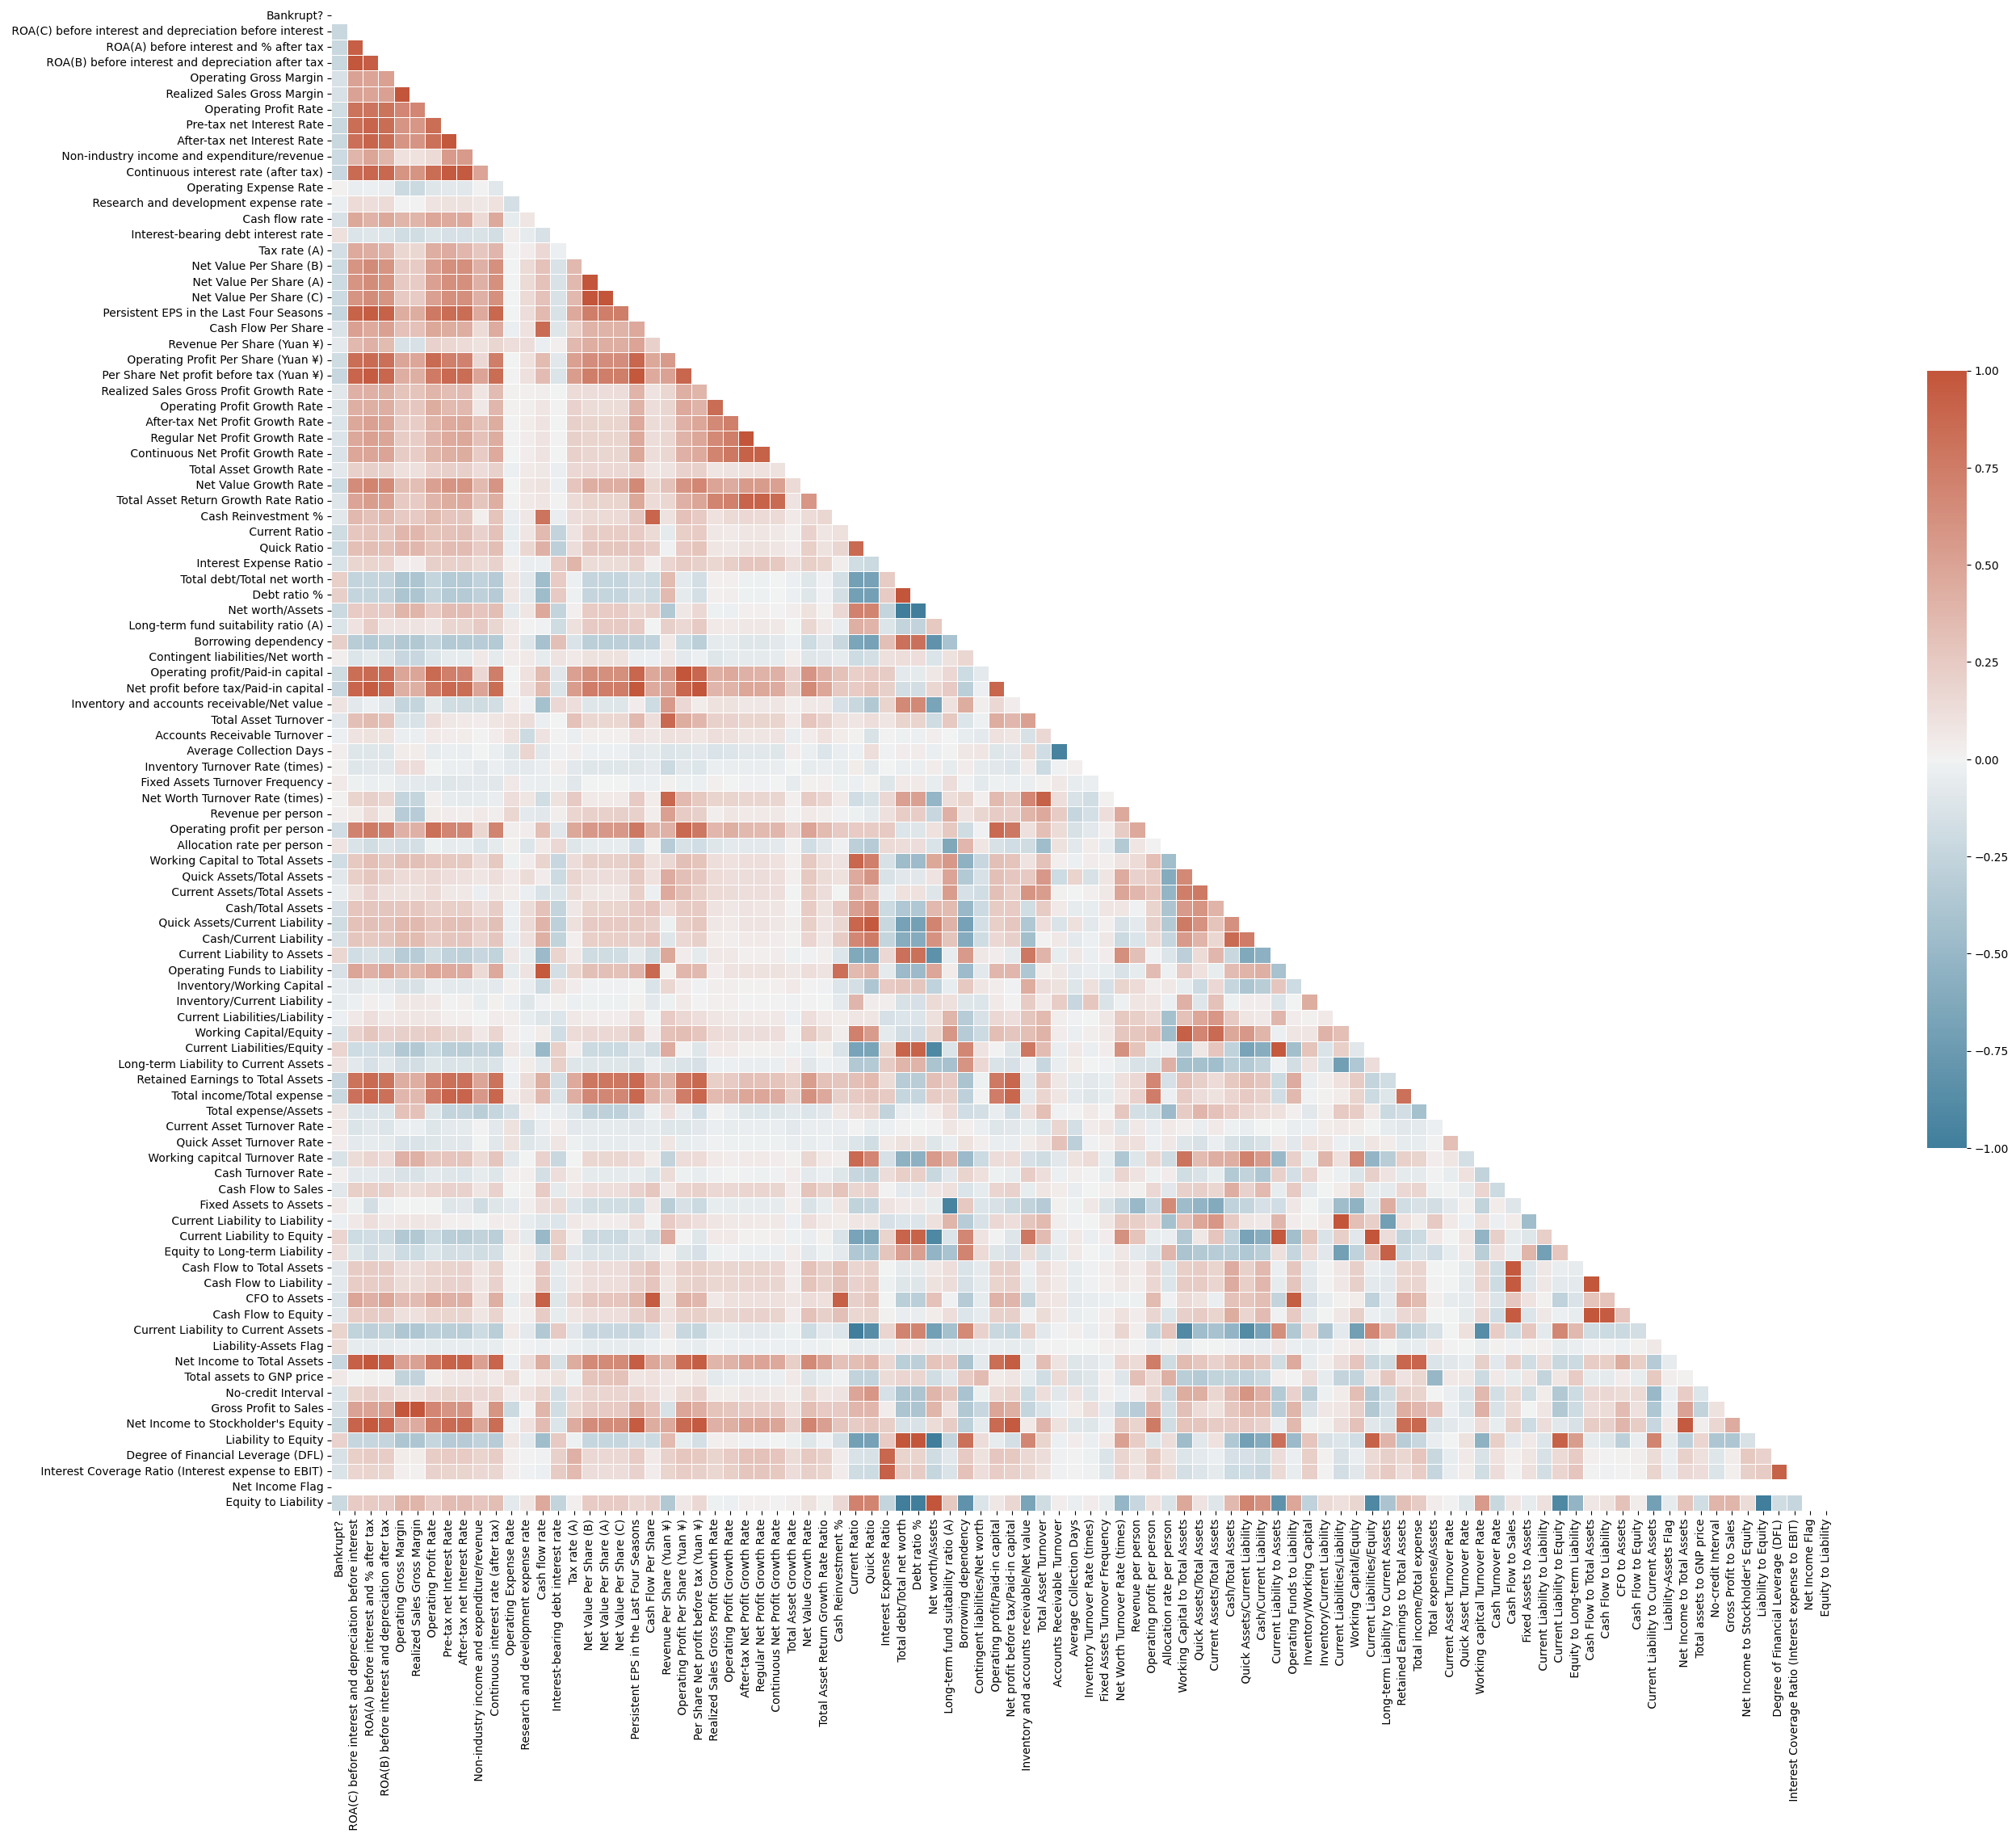

In [ ]:
f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

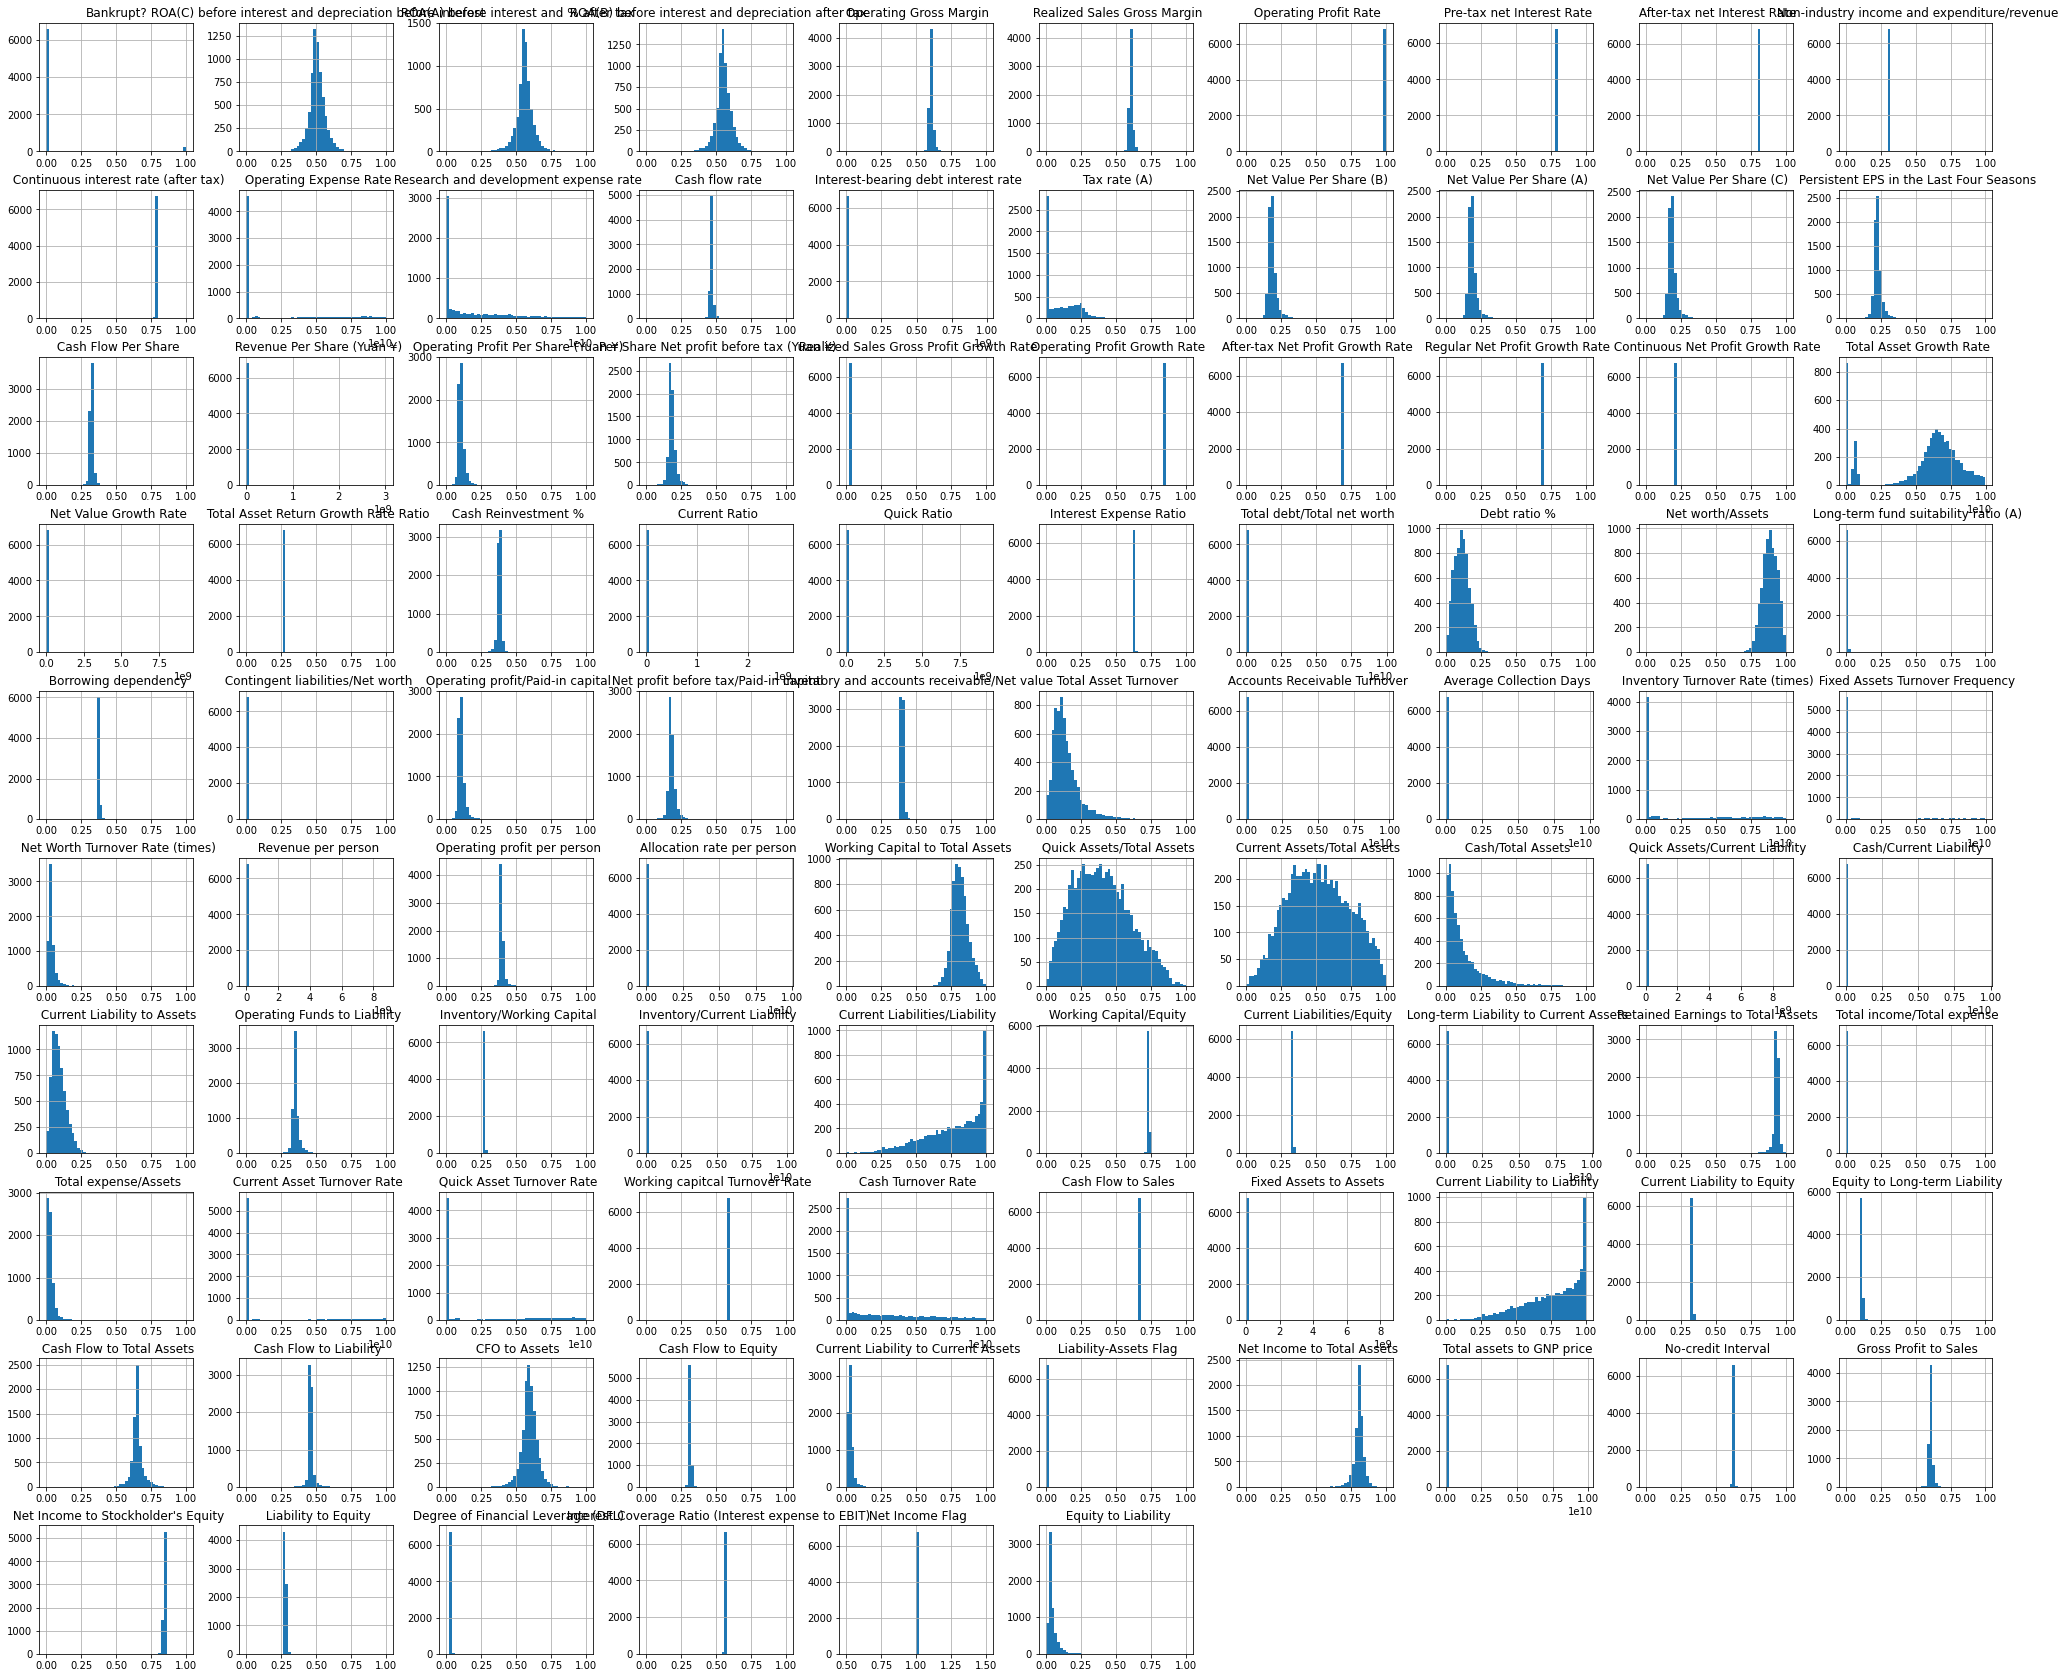

In [ ]:
df.hist(figsize = (35,30), bins = 50)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
X=df.drop(labels=['Bankrupt?'], axis=1)
y=df['Bankrupt?']

In [ ]:
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)

<Axes: xlabel='Bankrupt?', ylabel='count'>

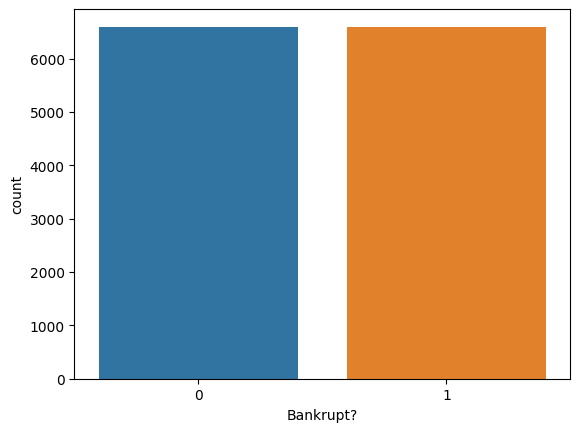

In [ ]:
sns.countplot(x=y)

In [ ]:
X

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,9.219440e-03,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,8.323302e-03,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,4.000285e-02,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,3.252475e-03,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,3.877563e-03,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,0.367421,0.398635,0.390043,0.598877,0.598877,0.998985,0.796951,0.808833,0.302726,0.781058,...,0.701854,1.953270e-03,0.623689,0.598874,0.824295,0.292188,0.026697,0.564666,1,0.015761
13194,0.244130,0.252812,0.274953,0.560497,0.560497,0.996156,0.793832,0.805968,0.303194,0.778121,...,0.663946,1.053499e+09,0.623818,0.560495,0.828897,0.282329,0.026756,0.564984,1,0.032934
13195,0.471941,0.538612,0.517772,0.597420,0.597420,0.998966,0.797368,0.809293,0.303494,0.781521,...,0.792459,1.295990e-02,0.622779,0.597421,0.839263,0.298708,0.024133,0.571742,1,0.014433
13196,0.455887,0.500433,0.501618,0.605039,0.605070,0.998951,0.797039,0.808989,0.302950,0.781250,...,0.772446,1.304002e-02,0.621670,0.605037,0.836651,0.289425,0.026451,0.562702,1,0.019656


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
13193    1
13194    1
13195    1
13196    1
13197    1
Name: Bankrupt?, Length: 13198, dtype: int64

In [ ]:
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

Train test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [ ]:
X_train.shape

(9898, 95)

In [ ]:
X_test.shape

(3300, 95)

Centering data along mean for appling PCA

In [ ]:
std = StandardScaler()
X_train_centered = X_train - X_train.mean(axis=0)
X_train_centered_scaled= std.fit_transform(X_train_centered)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(X_train_centered_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.97) + 1

In [ ]:
print('The n most important features is:',d)

The n most important features is: 55


In [ ]:
cumsum

array([0.16620404, 0.24087182, 0.28982627, 0.33216108, 0.37193249,
       0.40340297, 0.43320139, 0.4599552 , 0.48624685, 0.51015242,
       0.53108623, 0.54989033, 0.56791744, 0.58518496, 0.60074447,
       0.61586392, 0.63002847, 0.64345862, 0.656199  , 0.66865517,
       0.68085287, 0.69282301, 0.70454168, 0.71607143, 0.72748796,
       0.73856677, 0.74937122, 0.76013199, 0.77080663, 0.78135781,
       0.79187275, 0.80211189, 0.81217872, 0.82214209, 0.83191385,
       0.84144644, 0.85058007, 0.85939482, 0.86790769, 0.87626707,
       0.88444974, 0.89253196, 0.90021013, 0.90772478, 0.91500161,
       0.92189881, 0.92857981, 0.93510145, 0.94131612, 0.94727622,
       0.95282441, 0.95804569, 0.96258793, 0.96695649, 0.97082831,
       0.97466868, 0.97740998, 0.97981805, 0.98219297, 0.98440688,
       0.98652218, 0.98843927, 0.99024321, 0.99191358, 0.99340362,
       0.99466015, 0.99577088, 0.99675082, 0.99746413, 0.99808426,
       0.9985978 , 0.99891918, 0.99916895, 0.99939322, 0.99956

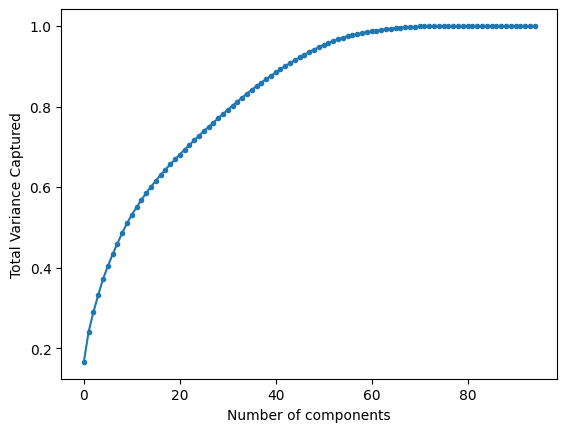

In [ ]:
plt.xlabel("Number of components")
plt.ylabel("Total Variance Captured")
plt.plot(cumsum,marker ='.')

In [ ]:
model_pca = PCA(n_components=55,random_state=42).fit(X_train_centered_scaled)
X_pca= model_pca.transform(X_train_centered_scaled)

In [ ]:
n_pcs= model_pca.components_.shape[0]

In [ ]:
var=model_pca.explained_variance_ratio_

In [ ]:
most_important = [np.abs(model_pca.components_[i]).argmax() for i in range(n_pcs)]

In [ ]:
len(most_important)

55

In [ ]:
pca_important_x_train_feat = X_train.iloc[:,most_important]
pca_important_x_test_feat = X_test.iloc[:,most_important]

In [ ]:
std_pca = StandardScaler()
pca_important_x_train_feat_scaled = std_pca.fit_transform(pca_important_x_train_feat)
pca_important_x_test_feat_scaled = std_pca.transform(pca_important_x_test_feat)

In [ ]:
std_norm = StandardScaler()
X_train_scaled = std_norm.fit_transform(X_train)
X_test_scaled = std_norm.transform(X_test)

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(solver='lbfgs', max_iter=10000)
log_model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred=log_model.predict(X_test_scaled)

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Precision Score: {precision_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')

Accuracy Score: 0.906969696969697
Confusion Matrix: 
[[1487  183]
 [ 124 1506]]
Area Under Curve: 0.9071727710223724
F1 Score: 0.9075022597167821
Precision Score: 0.8916518650088809
Recall Score: 0.9239263803680982


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1670
           1       0.89      0.92      0.91      1630

    accuracy                           0.91      3300
   macro avg       0.91      0.91      0.91      3300
weighted avg       0.91      0.91      0.91      3300



In [ ]:
pred_prob=log_model.predict_proba(X_test_scaled)
fpr, tpr, thresh=roc_curve(y_test,pred_prob[:,1],pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score=round(roc_auc_score(y_test,y_pred),2)

<ipython-input-46-ebab3b448073>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


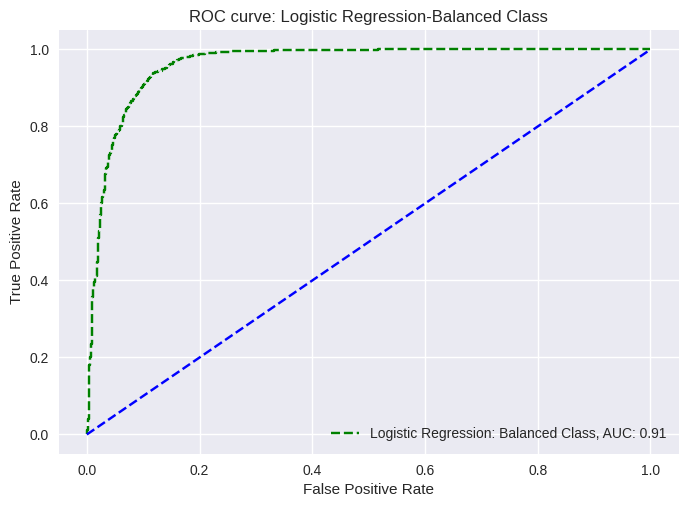

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='green', label="Logistic Regression: Balanced Class, AUC: "+str(auc_score))
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve: Logistic Regression-Balanced Class')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

In [ ]:
pred_prob=log_model.predict_proba(X_test_scaled)
precision, recall, thresh=precision_recall_curve(y_test,pred_prob[:,1],pos_label=1)

<ipython-input-48-66fb1b954573>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


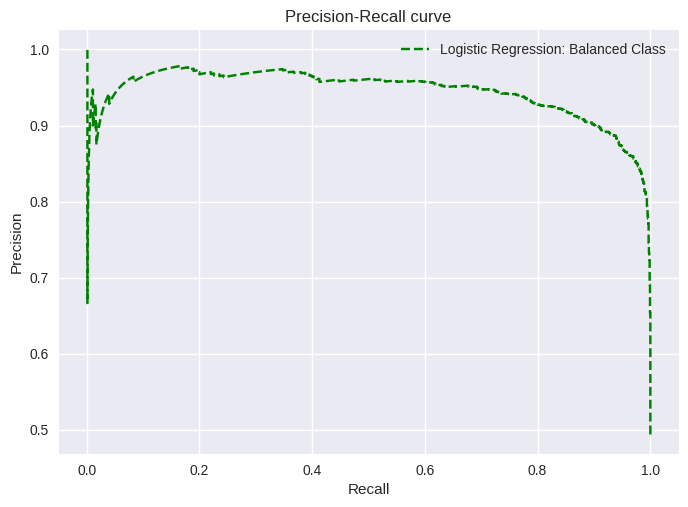

In [ ]:


plt.style.use('seaborn')

# plot precision-recall curve
plt.plot(recall, precision, linestyle='--',color='green', label="Logistic Regression: Balanced Class")

# title
plt.title('Precision-Recall curve')
# x label
plt.xlabel('Recall')
# y label
plt.ylabel('Precision')

plt.legend(loc='best')
plt.show();

## Logistic Regression Model with PCA reduced features and balanced weight

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model_pca=LogisticRegression(solver='lbfgs', max_iter=10000)
log_model_pca.fit(pca_important_x_train_feat_scaled,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred_pca=log_model_pca.predict(pca_important_x_test_feat_scaled)

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_pca)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_pca)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_pca)}')
print(f'F1 Score: {f1_score(y_test, y_pred_pca)}')
print(f'Precision Score: {precision_score(y_test, y_pred_pca)}')
print(f'Recall Score: {recall_score(y_test, y_pred_pca)}')

Accuracy Score: 0.8854545454545455
Confusion Matrix: 
[[1464  206]
 [ 172 1458]]
Area Under Curve: 0.8855626170970942
F1 Score: 0.8852459016393444
Precision Score: 0.8762019230769231
Recall Score: 0.894478527607362


In [ ]:
print(classification_report(y_test,y_pred_pca))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1670
           1       0.88      0.89      0.89      1630

    accuracy                           0.89      3300
   macro avg       0.89      0.89      0.89      3300
weighted avg       0.89      0.89      0.89      3300



## Decision tree classifier model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model=DecisionTreeClassifier(criterion='gini',max_depth=15,max_features=50,random_state=42)
dt_model.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=15, max_features=50, random_state=42)

In [ ]:
y_pred=dt_model.predict(X_test_scaled)

In [ ]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Precision Score: {precision_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')


Accuracy Score: 0.9463636363636364
Confusion Matrix: 
[[1541  129]
 [  48 1582]]
Area Under Curve: 0.9466533191286138
F1 Score: 0.9470218497455851
Precision Score: 0.9246054938632379
Recall Score: 0.9705521472392638


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1670
           1       0.92      0.97      0.95      1630

    accuracy                           0.95      3300
   macro avg       0.95      0.95      0.95      3300
weighted avg       0.95      0.95      0.95      3300



# Hyperparameter tuning of Decision tree classifier model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_dt = [{'max_depth': [12,15,18],'max_features': [50,60,70]}]

In [ ]:
grid_search_dt = GridSearchCV(dt_model,param_grid_dt,cv=5,scoring='f1',verbose=3)

In [ ]:
grid_search_dt.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....max_depth=12, max_features=50;, score=0.941 total time=   0.6s
[CV 2/5] END .....max_depth=12, max_features=50;, score=0.942 total time=   0.6s
[CV 3/5] END .....max_depth=12, max_features=50;, score=0.936 total time=   0.6s
[CV 4/5] END .....max_depth=12, max_features=50;, score=0.945 total time=   0.6s
[CV 5/5] END .....max_depth=12, max_features=50;, score=0.947 total time=   0.7s
[CV 1/5] END .....max_depth=12, max_features=60;, score=0.946 total time=   0.7s
[CV 2/5] END .....max_depth=12, max_features=60;, score=0.939 total time=   0.5s
[CV 3/5] END .....max_depth=12, max_features=60;, score=0.931 total time=   0.6s
[CV 4/5] END .....max_depth=12, max_features=60;, score=0.944 total time=   0.6s
[CV 5/5] END .....max_depth=12, max_features=60;, score=0.959 total time=   0.5s
[CV 1/5] END .....max_depth=12, max_features=70;, score=0.940 total time=   0.7s
[CV 2/5] END .....max_depth=12, max_features=70;,

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=8, max_features=39,
                                              random_state=42),
             param_grid=[{'max_depth': [12, 15, 18],
                          'max_features': [50, 60, 70]}],
             scoring='f1', verbose=3)

In [ ]:
grid_search_dt.best_params_

{'max_depth': 15, 'max_features': 50}

## Plotting decision tree

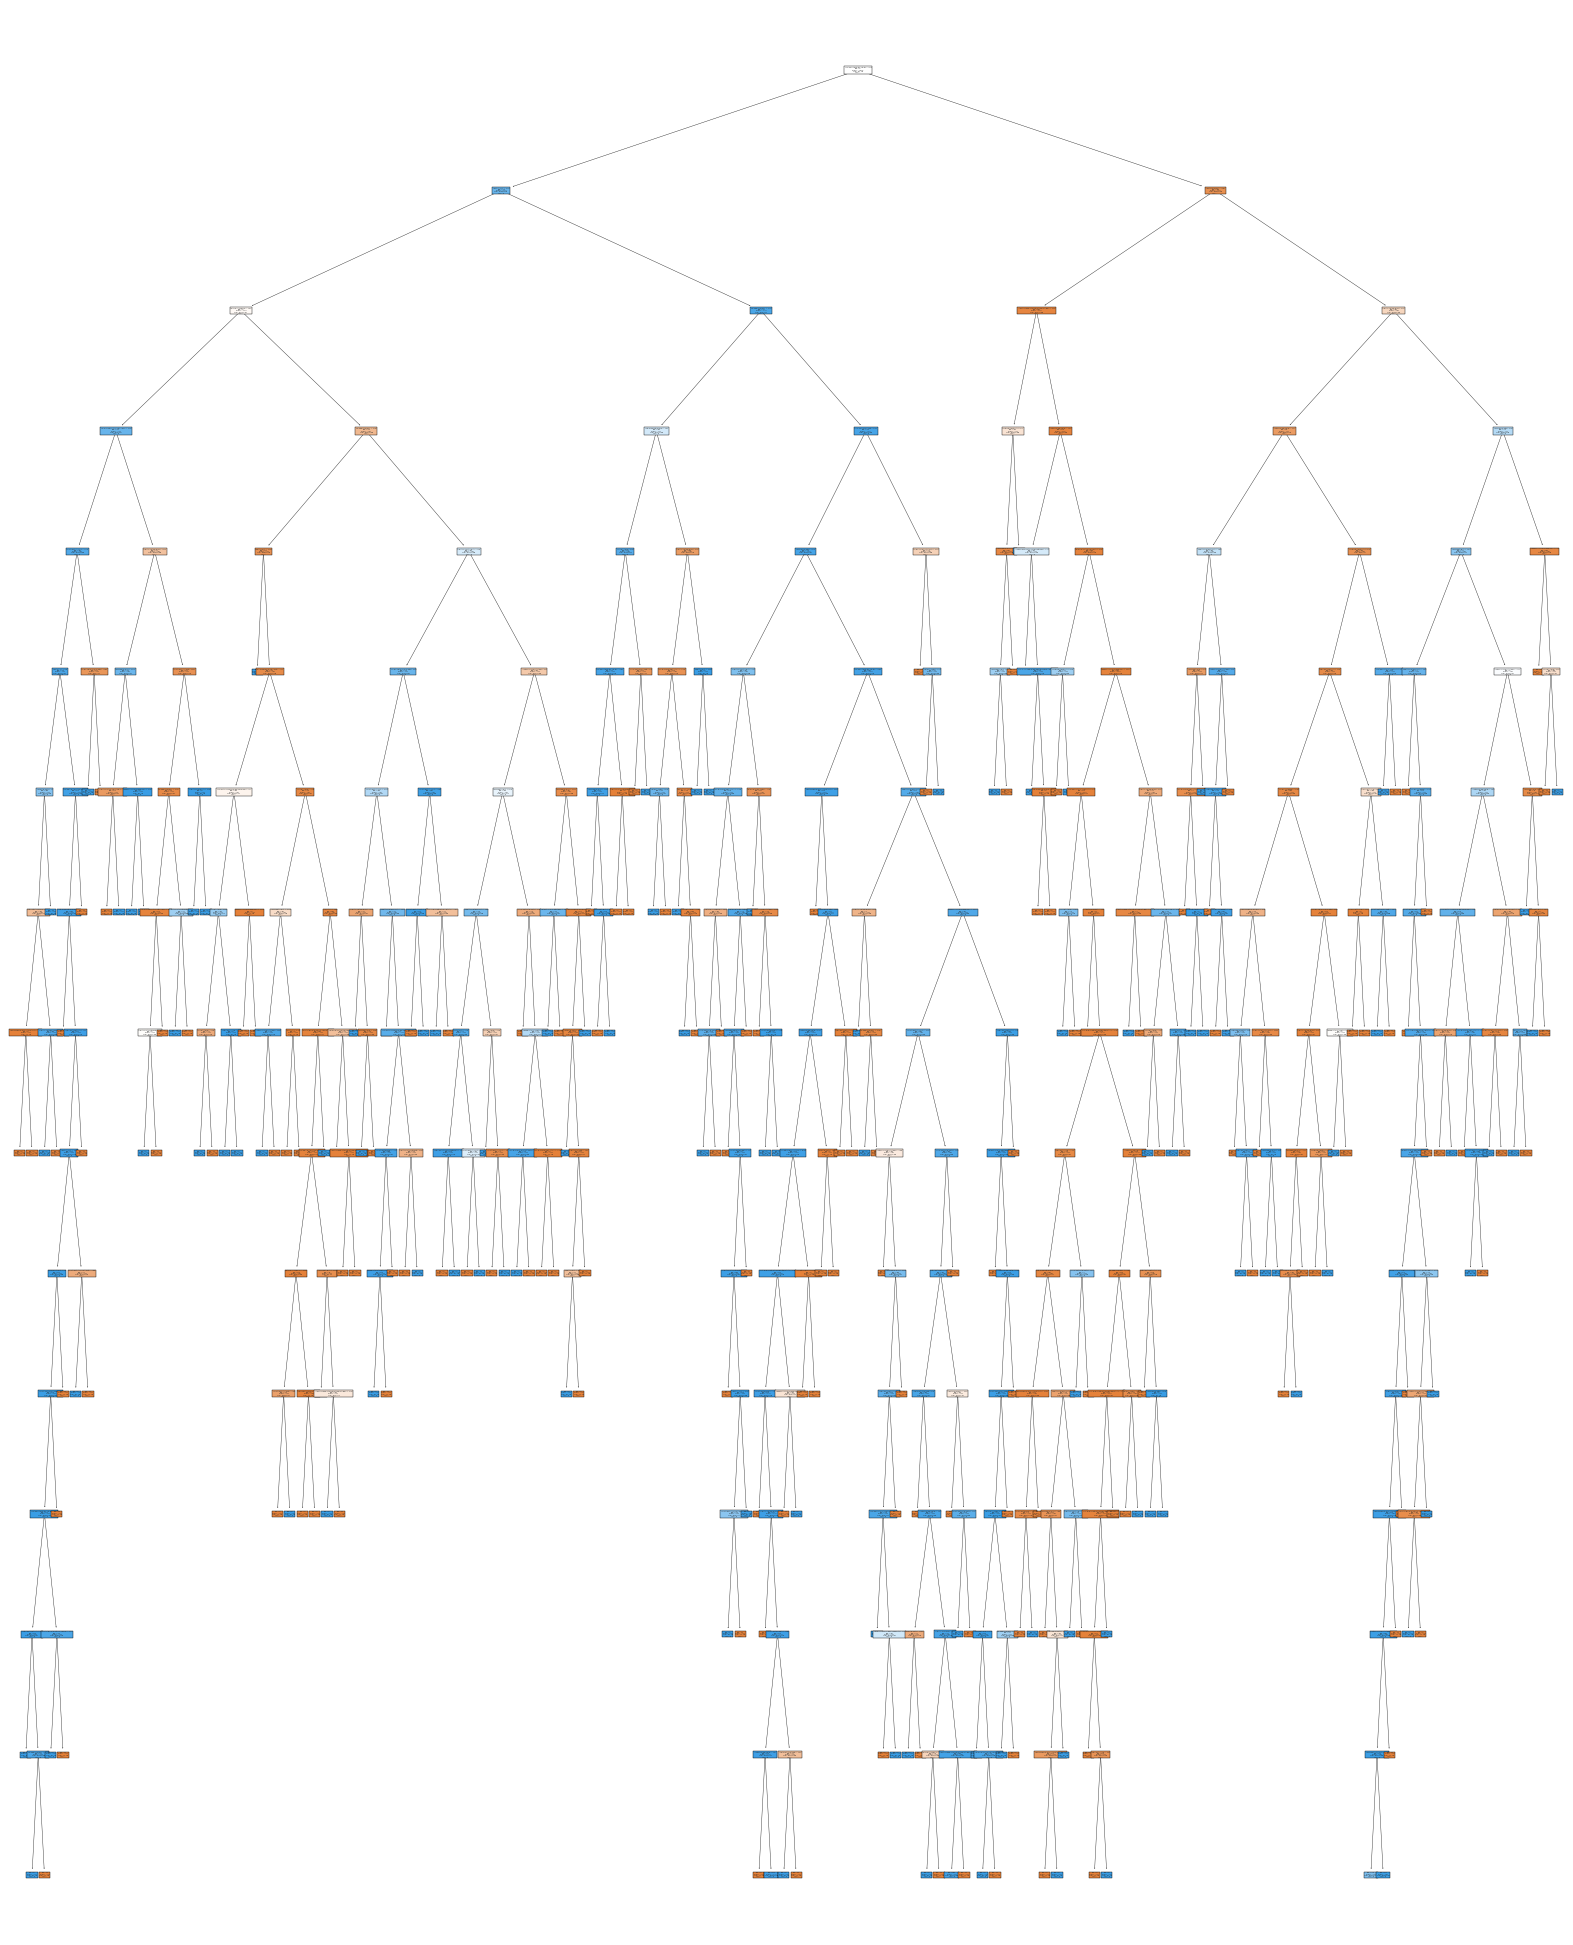

In [ ]:
#Plotting Decision Tree
col_names= df.columns[1:]
target_names=X_train.columns[0]

from sklearn import tree
plt.rcParams['figure.figsize'] = (20, 25)

tree.plot_tree(dt_model, filled=True, feature_names=col_names, class_names=target_names, proportion=True);
plt.savefig('DT.png')

## Decision tree classifier model with PCA reduced **feature**

In [ ]:
dt_model_pca=DecisionTreeClassifier(criterion='gini',max_depth=13,max_features=30,random_state=42)
dt_model_pca.fit(pca_important_x_train_feat_scaled,y_train)

DecisionTreeClassifier(max_depth=13, max_features=30, random_state=42)

In [ ]:
y_pred_pca=dt_model_pca.predict(pca_important_x_test_feat_scaled)

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_pca)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_pca)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_pca)}')
print(f'F1 Score: {f1_score(y_test, y_pred_pca)}')
print(f'Precision Score: {precision_score(y_test, y_pred_pca)}')
print(f'Recall Score: {recall_score(y_test, y_pred_pca)}')

Accuracy Score: 0.95
Confusion Matrix: 
[[1539  131]
 [  34 1596]]
Area Under Curve: 0.9503489952610118
F1 Score: 0.9508489722966935
Precision Score: 0.924145917776491
Recall Score: 0.9791411042944785


In [ ]:
print(classification_report(y_test,y_pred_pca))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1670
           1       0.92      0.98      0.95      1630

    accuracy                           0.95      3300
   macro avg       0.95      0.95      0.95      3300
weighted avg       0.95      0.95      0.95      3300



## Hyperparameter tuning of DT model with PCA reduced feature

In [ ]:
param_grid_dt_pca = [{'max_depth': [13,15],'max_features': [30,35,38]}]

In [ ]:
grid_search_dt_pca = GridSearchCV(dt_model_pca,param_grid_dt_pca,cv=5,scoring='f1',verbose=3)

In [ ]:
grid_search_dt_pca.fit(pca_important_x_train_feat_scaled,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .....max_depth=13, max_features=30;, score=0.954 total time=   0.6s
[CV 2/5] END .....max_depth=13, max_features=30;, score=0.960 total time=   0.7s
[CV 3/5] END .....max_depth=13, max_features=30;, score=0.940 total time=   0.6s
[CV 4/5] END .....max_depth=13, max_features=30;, score=0.940 total time=   0.6s
[CV 5/5] END .....max_depth=13, max_features=30;, score=0.956 total time=   0.5s
[CV 1/5] END .....max_depth=13, max_features=35;, score=0.948 total time=   0.4s
[CV 2/5] END .....max_depth=13, max_features=35;, score=0.949 total time=   0.3s
[CV 3/5] END .....max_depth=13, max_features=35;, score=0.945 total time=   0.4s
[CV 4/5] END .....max_depth=13, max_features=35;, score=0.939 total time=   0.3s
[CV 5/5] END .....max_depth=13, max_features=35;, score=0.950 total time=   0.3s
[CV 1/5] END .....max_depth=13, max_features=38;, score=0.945 total time=   0.3s
[CV 2/5] END .....max_depth=13, max_features=38;,

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=8, max_features=39,
                                              random_state=42),
             param_grid=[{'max_depth': [13, 15], 'max_features': [30, 35, 38]}],
             scoring='f1', verbose=3)

In [ ]:
grid_search_dt_pca.best_params_

{'max_depth': 13, 'max_features': 30}

# Random forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(max_depth=27,n_estimators = 150,oob_score=True,random_state=42)
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=27, n_estimators=150, oob_score=True,
                       random_state=42)

In [ ]:
y_pred=rf.predict(X_test_scaled)

In [ ]:
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Precision Score: {precision_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')

Accuracy Score: 0.9781818181818182
Confusion Matrix: 
[[1605   65]
 [   7 1623]]
Area Under Curve: 0.9783916828918849
F1 Score: 0.9783001808318265
Precision Score: 0.9614928909952607
Recall Score: 0.9957055214723927


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1670
           1       0.96      1.00      0.98      1630

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [{'n_estimators': [140,150,175],'max_depth': [27]}]

In [ ]:
grid_search_rf = GridSearchCV(rf,param_grid,cv=5,scoring='f1',verbose=3)

In [ ]:
grid_search_rf.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ....max_depth=27, n_estimators=140;, score=0.978 total time=  11.8s
[CV 2/5] END ....max_depth=27, n_estimators=140;, score=0.978 total time=   9.8s
[CV 3/5] END ....max_depth=27, n_estimators=140;, score=0.968 total time=   8.5s
[CV 4/5] END ....max_depth=27, n_estimators=140;, score=0.970 total time=  10.0s
[CV 5/5] END ....max_depth=27, n_estimators=140;, score=0.978 total time=   9.7s
[CV 1/5] END ....max_depth=27, n_estimators=150;, score=0.979 total time=   9.2s
[CV 2/5] END ....max_depth=27, n_estimators=150;, score=0.977 total time=  10.4s
[CV 3/5] END ....max_depth=27, n_estimators=150;, score=0.969 total time=  10.3s
[CV 4/5] END ....max_depth=27, n_estimators=150;, score=0.970 total time=  11.6s
[CV 5/5] END ....max_depth=27, n_estimators=150;, score=0.979 total time=  12.1s
[CV 1/5] END ....max_depth=27, n_estimators=175;, score=0.979 total time=  11.8s
[CV 2/5] END ....max_depth=27, n_estimators=175;,

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=7, n_estimators=200,
                                              oob_score=True, random_state=42),
             param_grid=[{'max_depth': [27], 'n_estimators': [140, 150, 175]}],
             scoring='f1', verbose=3)

In [ ]:
grid_search_rf.best_params_

{'max_depth': 27, 'n_estimators': 150}

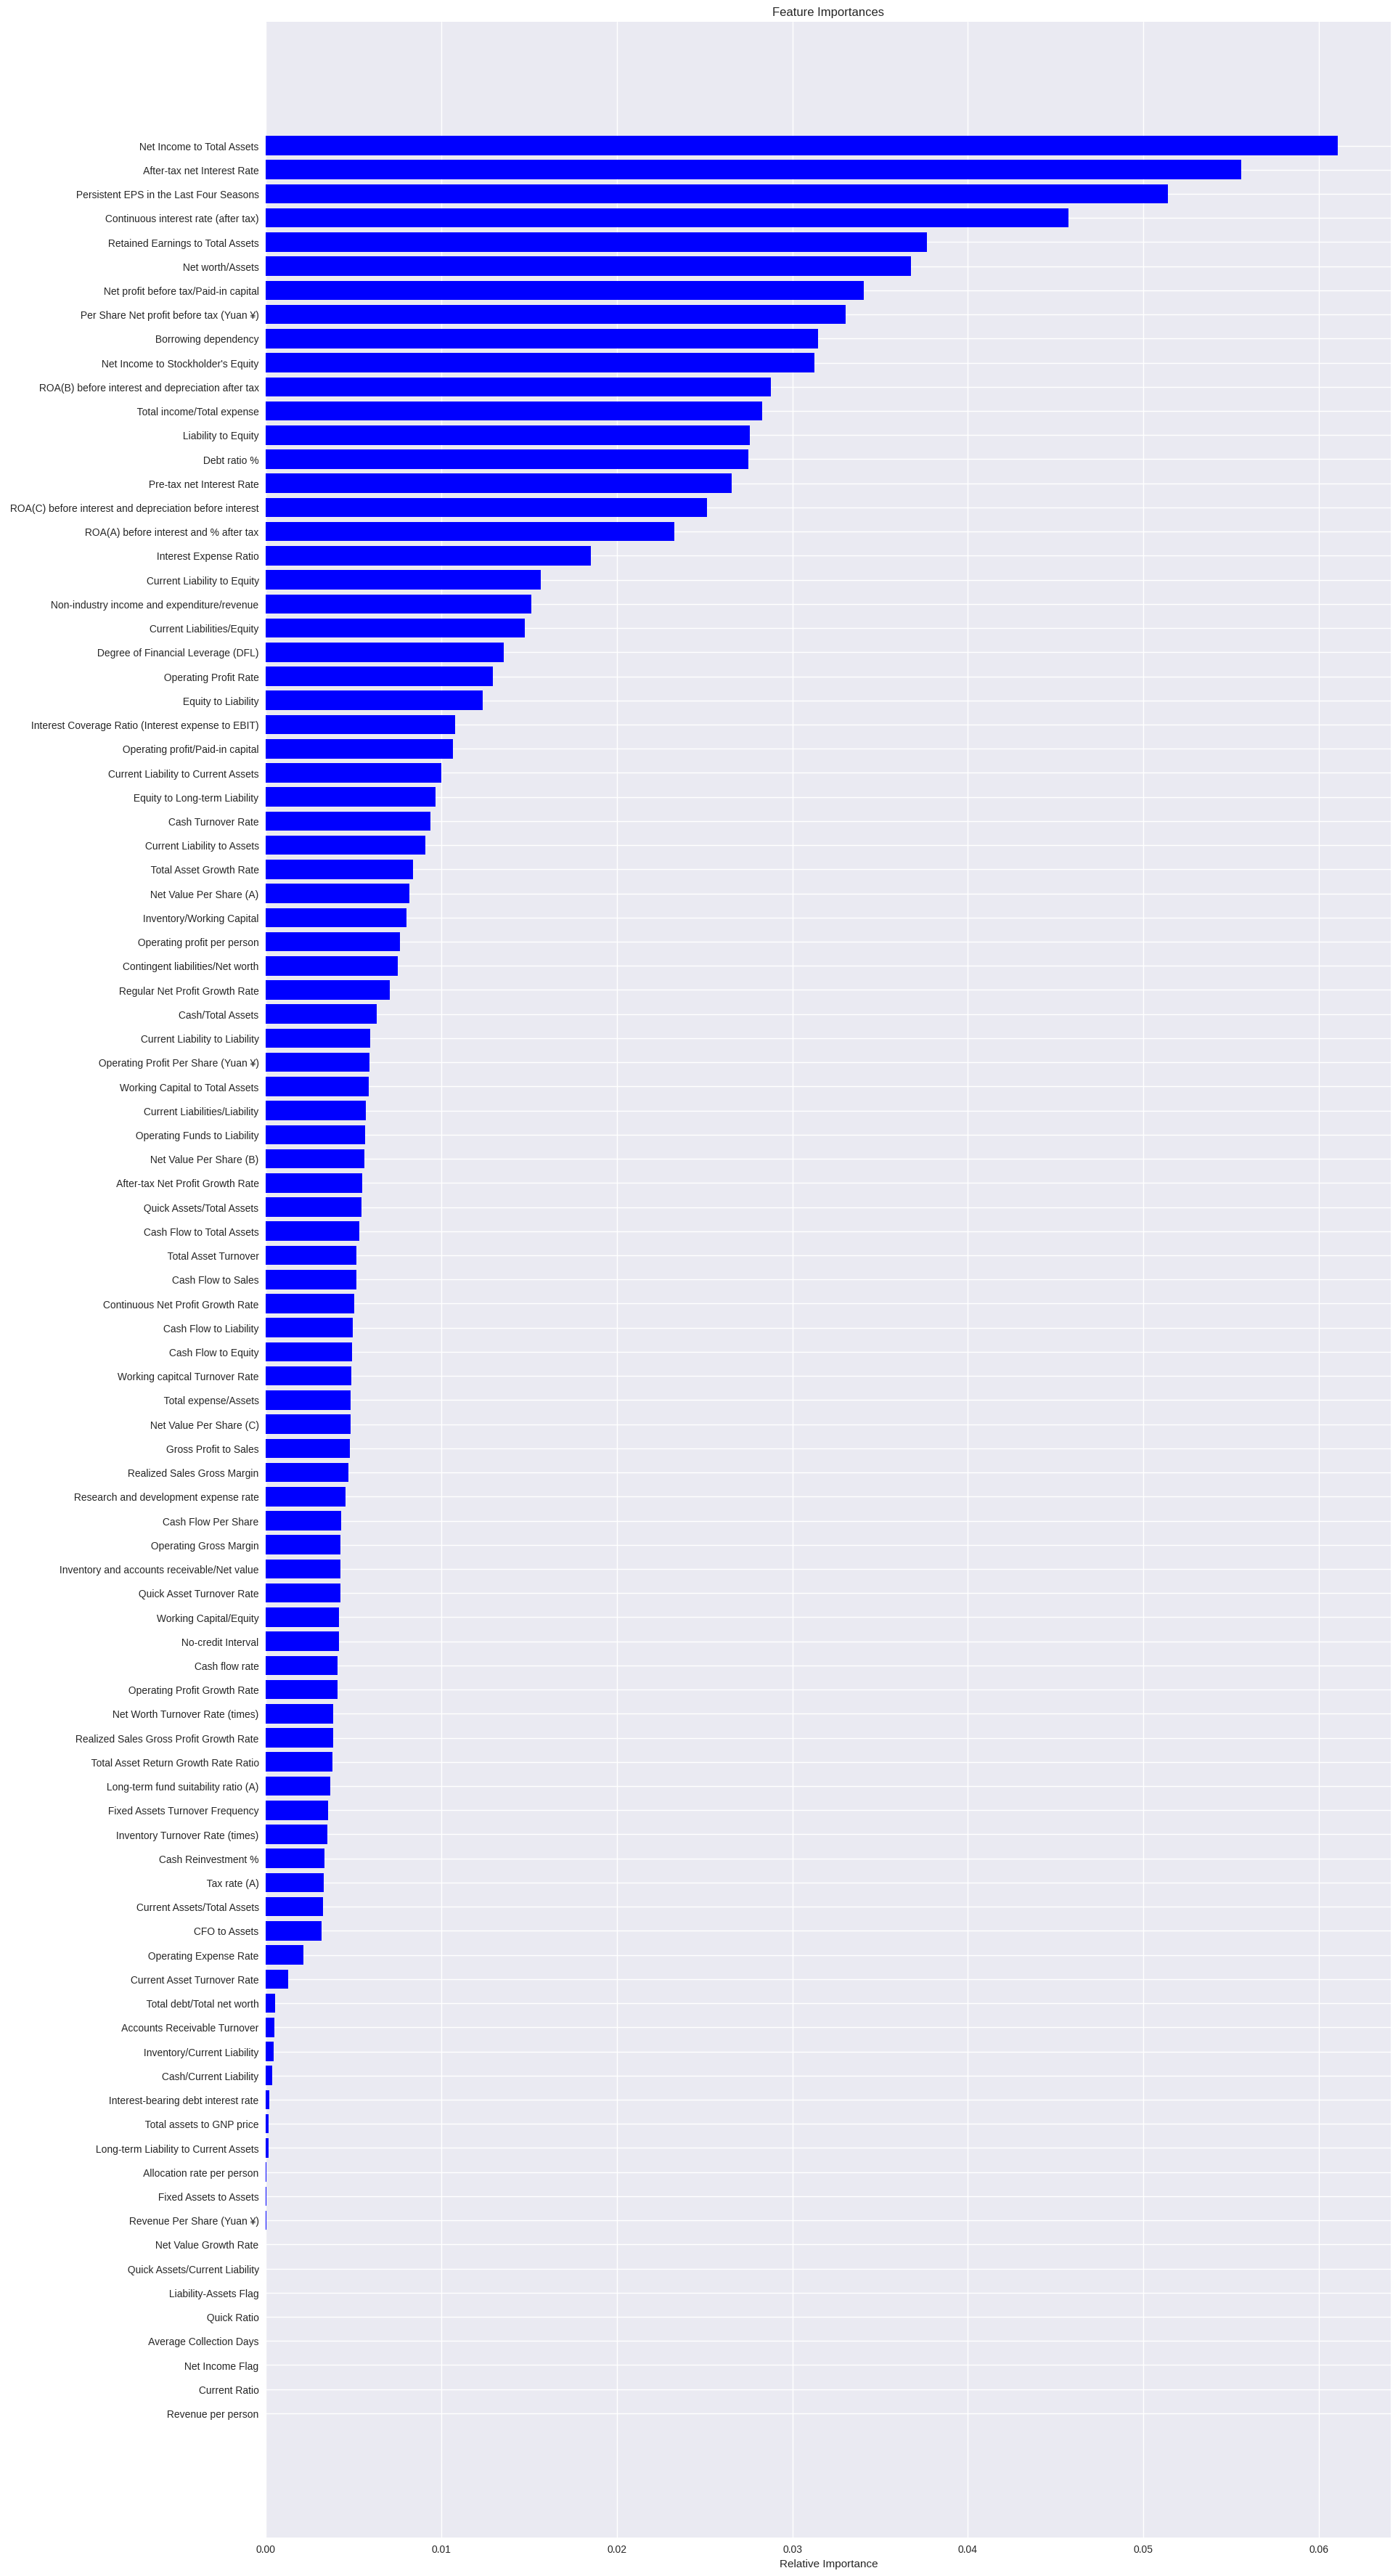

In [ ]:
#Feature Importance plot
features = df.columns[1:]
importances = rf.feature_importances_
indices = np.argsort(importances)


f = plt.figure()
f.set_figwidth(20)
f.set_figheight(45)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
clf1=LogisticRegression(random_state=42,max_iter=10000)
clf2=DecisionTreeClassifier(criterion='gini',max_depth=15,max_features=50,random_state=42)
clf3=RandomForestClassifier(max_depth=27,oob_score=True,random_state=42,n_estimators=150)


In [ ]:
#Hard Voting
voting_hard=VotingClassifier(estimators=[('lr',clf1),('dt',clf2),('rf',clf3)],voting='hard')
voting_hard.fit(X_train_scaled,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000,
                                                 random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=15,
                                                     max_features=50,
                                                     random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=27,
                                                     n_estimators=150,
                                                     oob_score=True,
                                                     random_state=42))])

In [ ]:
y_pred=voting_hard.predict(X_test_scaled)

In [ ]:
# performance-hard voting
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Precision Score: {precision_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')

Accuracy Score: 0.963030303030303
Confusion Matrix: 
[[1592  107]
 [  15 1586]]
Area Under Curve: 0.9638263166156821
F1 Score: 0.9629629629629629
Precision Score: 0.9367985823981099
Recall Score: 0.9906308557151781


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1670
           1       0.94      0.99      0.96      1630

    accuracy                           0.96      3300
   macro avg       0.96      0.96      0.96      3300
weighted avg       0.97      0.96      0.96      3300



In [ ]:
#Soft Voting
voting_soft=VotingClassifier(estimators=[('lr',clf1),('dt',clf2),('rf',clf3)],voting='soft')
voting_soft.fit(X_train_scaled,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000,
                                                 random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=15,
                                                     max_features=50,
                                                     random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=27,
                                                     n_estimators=150,
                                                     oob_score=True,
                                                     random_state=42))],
                 voting='soft')

In [ ]:
y_pred=voting_soft.predict(X_test_scaled)

In [ ]:
# performance-soft voting
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Precision Score: {precision_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')

Accuracy Score: 0.9621212121212122
Confusion Matrix: 
[[1565  105]
 [  20 1610]]
Area Under Curve: 0.9624279049263437
F1 Score: 0.9626307922272048
Precision Score: 0.9387755102040817
Recall Score: 0.9877300613496932


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1670
           1       0.94      0.99      0.96      1630

    accuracy                           0.96      3300
   macro avg       0.96      0.96      0.96      3300
weighted avg       0.96      0.96      0.96      3300

